In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)

def f(x, a = 0.5, b = 0.2):
    return a * x + b

def generate_points(n = 100):
    points = np.random.uniform(0, 1, size=(n, 2))
    label = np.array([1 if f(points[line,0]) < points[line,1] else -1 for line in range(n)])
    label = np.reshape(label, (-1, 1))
    
    dataset = np.append(points, label, axis = 1)

    np.savetxt('point.txt', dataset, fmt='%f')

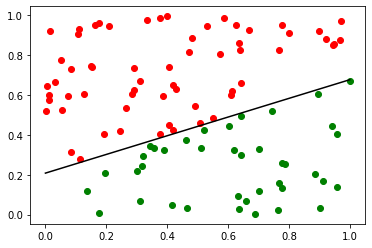

In [2]:
def perceptron():
    points_and_label = np.genfromtxt('point.txt', delimiter=' ')
    X = points_and_label[:, :-1]
    X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
    label = points_and_label[:, -1]

    w = np.zeros(X.shape[1])

    prev_w = w.copy()
    while True:
        for i in range(X.shape[0]):
            net = np.dot(X[i], w)
            y = 1 if net >= 0 else -1
            e = y - label[i]
            w = w - X[i] * e
        if np.all(w == prev_w):
            break
        prev_w = w.copy()

    plt.plot(X[label==1, 1], X[label==1, 2], 'ro', color='red')
    plt.plot(X[label==-1, 1], X[label==-1, 2], 'ro', color='green')

    x1 = np.array([0, 1])
    x2 = (-x1 * w[1] - w[0]) / w[2]

    plt.plot(x1, x2, color='black')
    plt.show()

if __name__ == "__main__":
    generate_points()
    perceptron()